## HUMAN ACTIVITY RECOGNITION WITH SMARTPHONE DATA


In [1]:
#importing neccessary libraries for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")  #Training data in form of a dataframe
df_test=pd.read_csv("test.csv")    #testing data in form of a dataframe
df_train.head()                #printing the first 5 rows of data to get a sense of the data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
df_train.isnull().sum().sum()    #checking for Null values in the dataframe

0

In [4]:
df_test.isnull().sum().sum()

0

([<matplotlib.patches.Wedge at 0x1f7f496f8d0>,
 [Text(0.9246289077905214, 0.5958702735311667, 'LAYING'),
  Text(-0.15485784087840757, 1.089045017030278, 'SITTING'),
  Text(-1.0393322592014753, 0.3602616479493165, 'STANDING'),
  Text(-0.8280699520170185, -0.7240857370274139, 'WALKING'),
  Text(0.18960134430378683, -1.0835364923426423, 'WALKING_DOWNSTAIRS'),
  Text(0.9915739703260872, -0.4762153518858462, 'WALKING_UPSTAIRS')],
 [Text(0.5043430406130116, 0.3250201491988182, '18.22'),
  Text(-0.08446791320640411, 0.5940245547437878, '18.05'),
  Text(-0.5669085050189865, 0.1965063534268999, '16.83'),
  Text(-0.45167451928201, -0.3949558565604075, '16.66'),
  Text(0.10341891507479281, -0.5910199049141684, '15.98'),
  Text(0.5408585292687748, -0.2597538283013706, '14.25')])

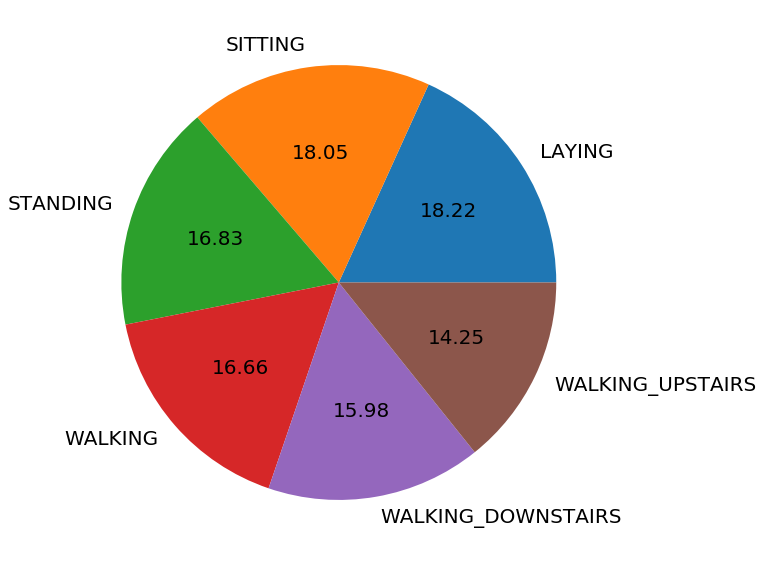

In [5]:
#Count the number of records for each activity
count_of_each_activity = np.array(df_test['Activity'].value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(df_test["Activity"].unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 20})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

<BarContainer object of 3 artists>

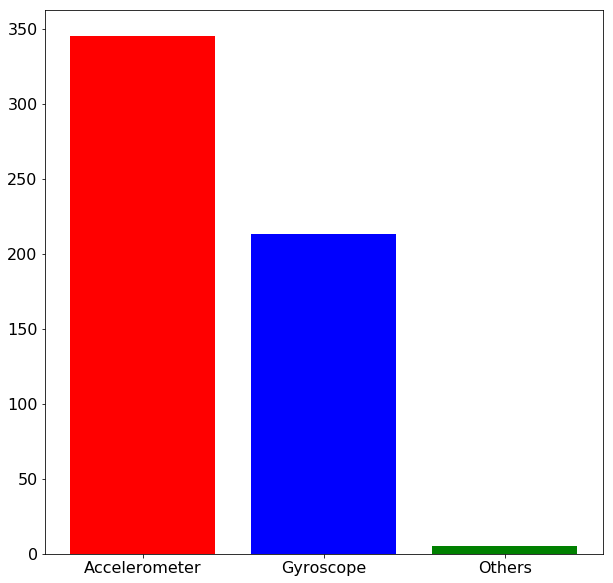

In [6]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in df_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))


In [7]:
df_train["subject"].unique()   #subjects in the training dataset

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [8]:
l=df_train.groupby("Activity")   #getting the data of each subject per activity so that we can observe the time series
standing_activity=l.get_group("STANDING")   #observing the data for activity standing
a=standing_activity.groupby("subject")    #getting groupwise data of each subject
p1=a.get_group(1)
p2=a.get_group(3)
p3=a.get_group(5)
p4=a.get_group(6)
p5=a.get_group(7)
p6=a.get_group(8)

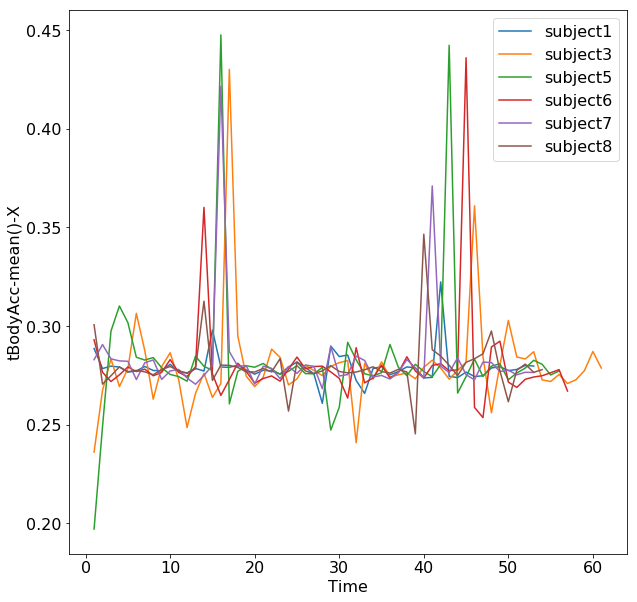

In [9]:
#plotting the time series of each subject for any given activity and any given feature. Such plotting is helpful in understanding the data given to us
def plot_line(p1,lab):         
    t=[]
    x=(p1["tBodyAcc-mean()-X"])
    for i in range(len(x)):
        t.append(i+1)
    plt.plot(t,x, label=lab)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("tBodyAcc-mean()-X")
plot_line(p1,"subject1")
plot_line(p2,"subject3")
plot_line(p3,"subject5")
plot_line(p4,"subject6")
plot_line(p5,"subject7")
plot_line(p6,"subject8")

In [10]:
X_train= df_train.drop(columns=["Activity","subject"])
y_train= df_train["Activity"]
X_test= df_test.drop(columns=["Activity","subject"])
y_test= df_test["Activity"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [11]:
#importing scaling functions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_train)
#feature scaling of training and testing data
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [12]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#applying the KNN algorithm 
clf = KNeighborsClassifier(n_neighbors = 3)  #taking the value of k=3
clf.fit(X_train, y_train)   #fitting the training and testing data to make the model
y_pred_knn = clf.predict(X_test)         #testing the model with testing data
acc_knn = round(clf.score(X_train, y_train) * 100, 2)      #accuracy of the model
print (acc_knn)

99.18


In [14]:
#importing the libraries for the confussion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
report_knn=classification_report(y_test, y_pred_knn, output_dict=True)
precision_knn =  report_knn["weighted avg"]["precision"] 
recall_knn = report_knn['weighted avg']['recall']  
print(classification_report(y_test, y_pred_knn))

[[509  18  10   0   0   0]
 [  2 369 119   0   0   1]
 [  0  49 483   0   0   0]
 [  0   0   0 485   9   2]
 [  0   0   0  65 309  46]
 [  0   0   0  45   6 420]]
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.85      0.75      0.80       491
          STANDING       0.79      0.91      0.84       532
           WALKING       0.82      0.98      0.89       496
WALKING_DOWNSTAIRS       0.95      0.74      0.83       420
  WALKING_UPSTAIRS       0.90      0.89      0.89       471

         micro avg       0.87      0.87      0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947



In [15]:
error = []
# Calculating error for K values between 1 and 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))    #mean error for a single K value

Text(0, 0.5, 'Mean Error')

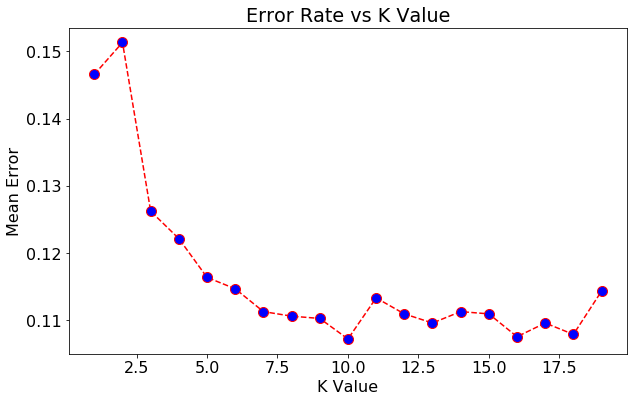

In [16]:
#plotting the error data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [17]:
#importing the classifier library for LOgistic regression
from sklearn.linear_model import LogisticRegression

In [18]:
#applying logistic regression to the training data
clf = LogisticRegression(solver="newton-cg",multi_class="multinomial")
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')   #accuracy

99.65 percent


In [19]:
#importing the libraries for the confussion matrix and classification report
print(confusion_matrix(y_test, y_pred_log_reg))
report_log_reg=classification_report(y_test, y_pred_log_reg, output_dict=True) #stores the classification report as a python dictionary
precision_log_reg =  report_log_reg["weighted avg"]["precision"]  #storing weighted average value of precision
recall_log_reg = report_log_reg['weighted avg']['recall']    #stroing weightd average value of recall
print(classification_report(y_test, y_pred_log_reg))   

[[533   0   4   0   0   0]
 [  1 428  60   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   1   7 396  16]
 [  0   0   0  24   1 446]]
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.95       471

         micro avg       0.95      0.95      0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947



In [20]:
from sklearn.svm import SVC

In [21]:
#applying SVM algorithm to the training and testing data
clf_svm= SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
acc_svm = round( clf_svm.score(X_train, y_train) * 100, 2)
print (str(acc_svm) + ' percent')

98.67 percent


In [22]:
#importing the libraries for the confussion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
mat=confusion_matrix(y_test, y_pred_svm)
print(mat)
report_svm=classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm =  report_svm["weighted avg"]["precision"] #storing precision and recall values for further use.
recall_svm = report_svm['weighted avg']['recall']  
print(classification_report(y_test, y_pred_svm))


[[537   0   0   0   0   0]
 [  3 441  46   0   0   1]
 [  0  29 503   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0   6 386  28]
 [  0   0   0  14   1 456]]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.94      0.90      0.92       491
          STANDING       0.92      0.95      0.93       532
           WALKING       0.96      0.97      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.97      0.95       471

         micro avg       0.95      0.95      0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [23]:
#apllying 2 types of Naive Bayes algorithm 
from sklearn.naive_bayes import BernoulliNB  #bernoulli Naive bayes
from sklearn.naive_bayes import GaussianNB   #gaussian Niave bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)  #accuracy for naive bayes algorithm
print (acc_gnb)

74.62


In [24]:
#fitting the training data for a bernoulli naive bayes algorithm
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred_bnb = clf.predict(X_test)
acc_bnb = round(clf.score(X_train, y_train) * 100, 2)  #algorithm for bernoulli algorithm
print (acc_bnb)

82.6


In [25]:
mat=confusion_matrix(y_test, y_pred_bnb)
print(mat)
report_bnb=classification_report(y_test, y_pred_bnb, output_dict=True)
precision_bnb =  report_bnb["weighted avg"]["precision"] 
recall_bnb = report_bnb['weighted avg']['recall']  
print(classification_report(y_test, y_pred_bnb))

[[515  21   0   0   0   1]
 [ 17 326 146   0   0   2]
 [  0  47 484   0   0   1]
 [  0   0   0 398  71  27]
 [  0   0   0  31 330  59]
 [  0   0   0  19  89 363]]
                    precision    recall  f1-score   support

            LAYING       0.97      0.96      0.96       537
           SITTING       0.83      0.66      0.74       491
          STANDING       0.77      0.91      0.83       532
           WALKING       0.89      0.80      0.84       496
WALKING_DOWNSTAIRS       0.67      0.79      0.73       420
  WALKING_UPSTAIRS       0.80      0.77      0.79       471

         micro avg       0.82      0.82      0.82      2947
         macro avg       0.82      0.82      0.81      2947
      weighted avg       0.83      0.82      0.82      2947



In [26]:
#storing the accuracy, precision and recall values for each algorithm in a new dataframe
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN','Naive Bayes'],
    'Accuracy %': [acc_log_reg, acc_svm, acc_knn,  acc_bnb],
    'Precision' : [precision_log_reg, precision_svm, precision_knn, precision_bnb],
    'Recall' : [recall_log_reg, recall_svm, recall_knn, recall_bnb]
    })
models.sort_values(by='Precision', ascending=False)    #sorting the algortihm based on precison values. 

,Model,Accuracy %,Precision,Recall
0,Logistic Regression,99.65,0.956672,0.954869
1,Support Vector Machines,98.67,0.952236,0.951815
2,KNN,99.18,0.881221,0.873770
3,Naive Bayes,82.60,0.826513,0.819817
